In [2]:
#pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize_scalar


In [3]:
#load the data
df = pd.read_csv('Digital Marketing DSA Vinterns 2024 Data.csv')

### Exploratory data analysis

In [4]:
df.head()

,category_2,category_3,number_of_listings,avg_listing_price_eur,revenue_from_push_ups
0,ACCESSORIES_JEWELLERY,ACCESS_MOBILE,14228,28.081851,492.0
1,ACCESSORIES_JEWELLERY,BELTS,29838,21.273161,1382.0
2,ACCESSORIES_JEWELLERY,GLOVES,6350,17.043860,304.0
3,ACCESSORIES_JEWELLERY,JEWELRY,343493,17.935880,20554.0
4,ACCESSORIES_JEWELLERY,KEY_RINGS,5,15.900000,NaN


In [6]:
#get unique values of category_2 and category_3 colums
print(len(df['category_2'].unique()))
print(len(df['category_3'].unique()))

36
229


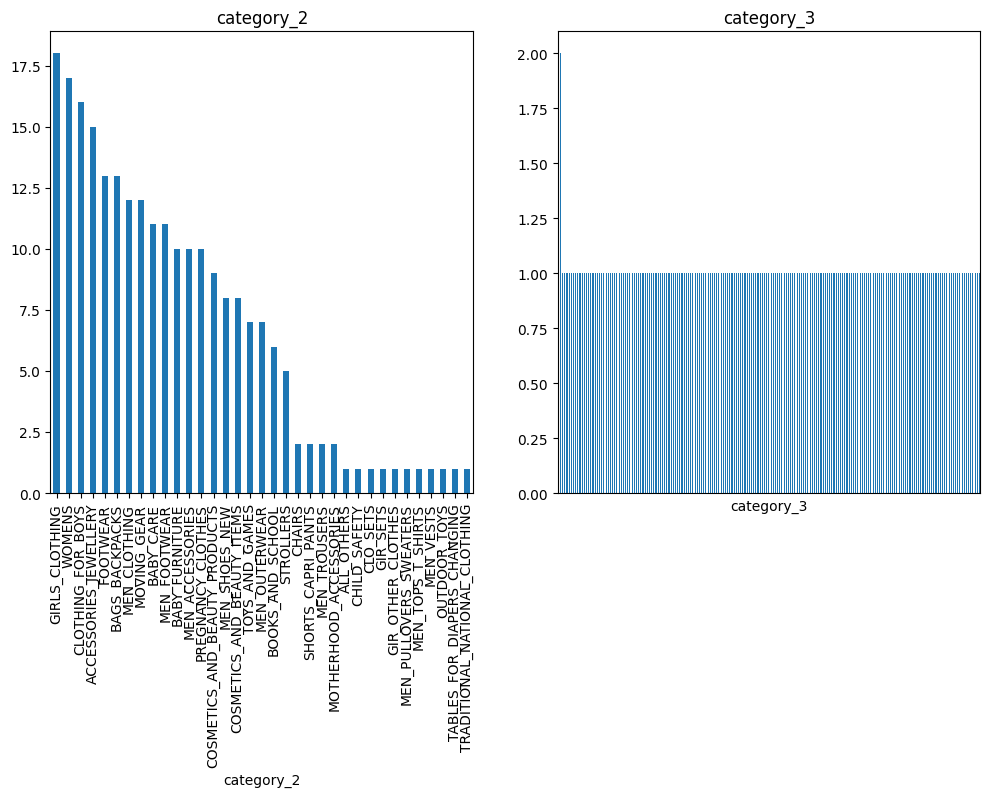

In [8]:
#plot the distribution of category_2 and category_3
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df['category_2'].value_counts().plot(kind='bar')
plt.title('category_2')
plt.subplot(1,2,2)
df['category_3'].value_counts().plot(kind='bar')
plt.title('category_3')
#hide labels for category_3
plt.xticks([])
plt.show()

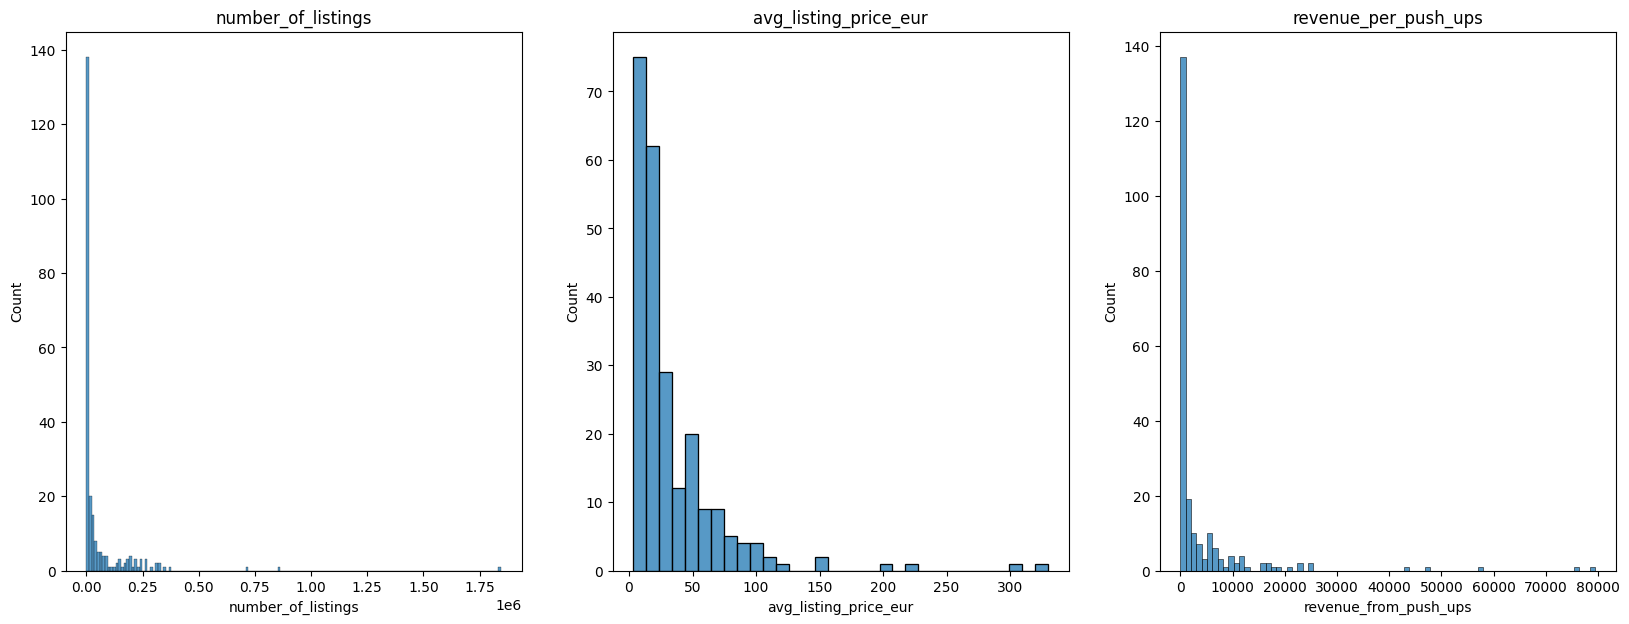

In [12]:
#distribution of number_of_listings, avg_listing_price_eur, revenue_per_push_ups plot
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.histplot(df['number_of_listings'])
plt.title('number_of_listings')
plt.subplot(1,3,2)
sns.histplot(df['avg_listing_price_eur'])   
plt.title('avg_listing_price_eur')
plt.subplot(1,3,3)
sns.histplot(df['revenue_from_push_ups'])
plt.title('revenue_per_push_ups')
plt.show()


In [3]:
#for each column check missing values
print(df.isnull().sum())

category_2                1
category_3                8
number_of_listings        0
avg_listing_price_eur     0
revenue_from_push_ups    15
dtype: int64


In [4]:
#drop nans
df.dropna(inplace=True)

## CURRENT SITUATION

#### A) User Interest Metric

To measure the interest of users in the push up feature, we define a metric push up revenue per listing. It tells us how much revenue on average each listing brings. If clients are interested in it, the feature will be used more times and this metric will be higher. 


In [6]:
rev_per_list = df['revenue_from_push_ups']/df['number_of_listings']
mean_rev_per_list = rev_per_list.mean()
print(f'mean revenue per listing accross all categories: {mean_rev_per_list}')


mean revenue per listing accross all categories: 0.07282687558274531


In [7]:
#get category_2 and category_3 with highest revenue per listing
df['rev_per_list'] = rev_per_list
print(df.groupby('category_2')['rev_per_list'].mean().sort_values(ascending=False).head(10))
print(df.groupby('category_3')['rev_per_list'].mean().sort_values(ascending=False).head(10))


category_2
STROLLERS                 0.148869
OUTDOOR_TOYS              0.144796
MEN_SHOES_NEW             0.121943
MEN_OUTERWEAR             0.110025
BABY_FURNITURE            0.109858
MEN_PULLOVERS_SWEATERS    0.104561
CHAIRS                    0.103457
MEN_FOOTWEAR              0.095045
FOOTWEAR                  0.091309
BAGS_BACKPACKS            0.091284
Name: rev_per_list, dtype: float64
category_3
MEN_FORMAL                    0.363636
SPORT_STROLLERS               0.184748
UMBRELLA_SHAPE_STROLLERS      0.180519
NURSERIES                     0.176299
MEN_OUT_HALF_LENGTH_COATS     0.172668
FOR_TWINS                     0.166376
SATCHELS_NEW                  0.153846
MEN_ACC_WATCHES               0.153177
OUTERWEAR                     0.151255
SPECIAL_OUTFITS_COSTUMES_W    0.150893
Name: rev_per_list, dtype: float64


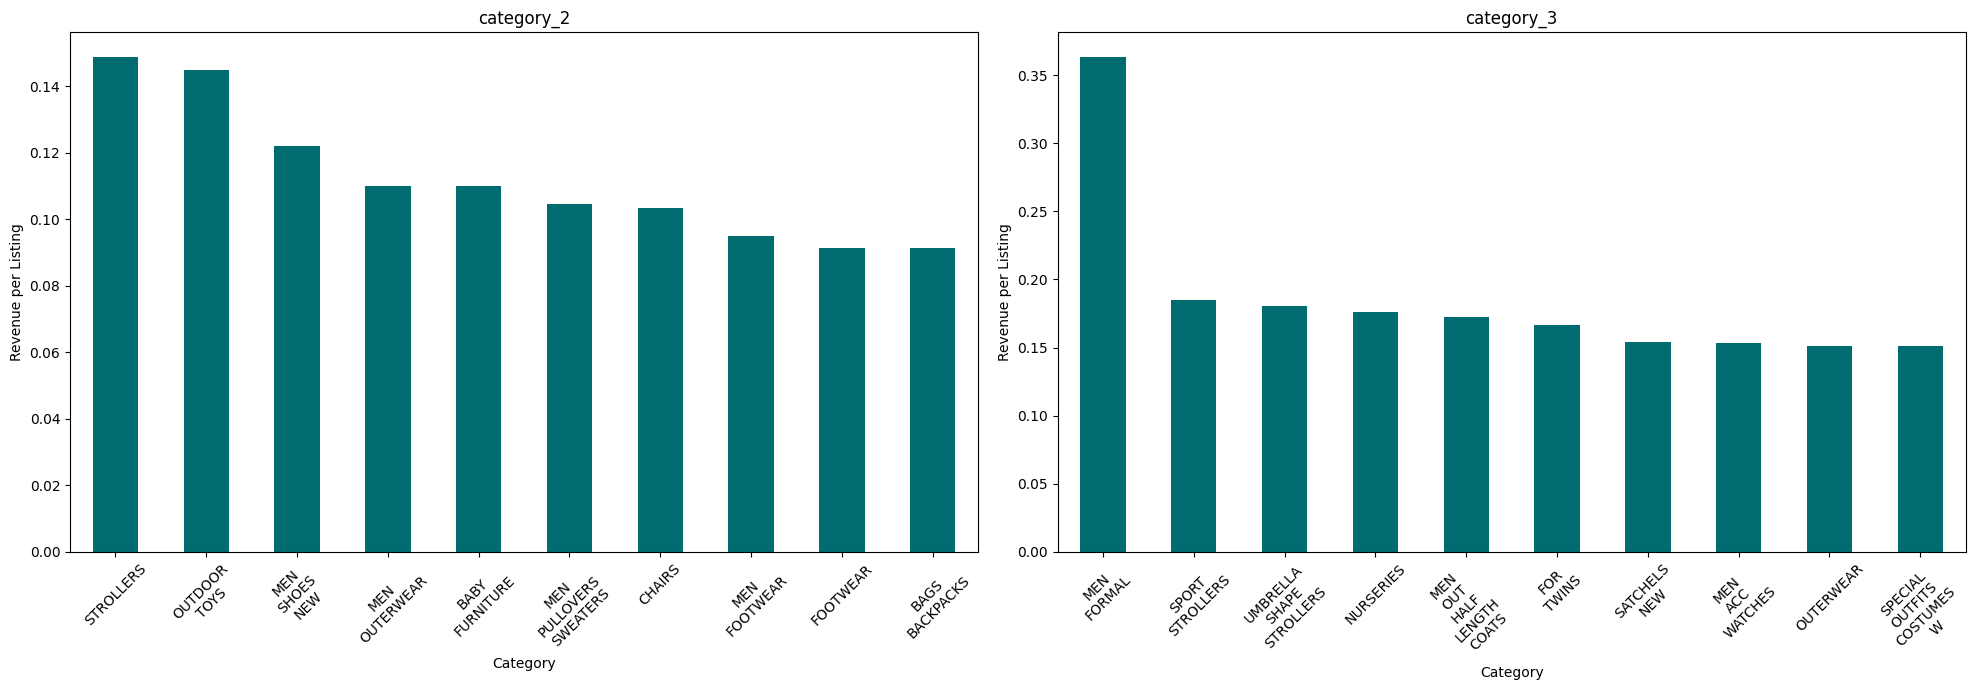

In [104]:
df['category_2'] = df['category_2'].str.replace('_', '\n')
df['category_3'] = df['category_3'].str.replace('_', '\n')

plt.figure(figsize=(20,7))

# Plot for category_2
plt.subplot(1,2,1)
df.groupby('category_2')['rev_per_list'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color = '#006c70')
plt.title('category_2')
plt.xlabel('Category')
plt.ylabel('Revenue per Listing')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot for category_3
plt.subplot(1,2,2)
df.groupby('category_3')['rev_per_list'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color = '#006c70')
plt.title('category_3')
plt.xlabel('Category')
plt.ylabel('Revenue per Listing')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  
plt.savefig('category_2_3.png', dpi=300)
plt.show()


The best performing category_2 is Strollers and the best category_3 is men formal.

### B) Another Interest Metric, correlated to the previous one.

Another way to define a metric to measure interest is average listing price. It is expected that the price will be higher when sellers choose to push their listings. Also more expensive item will have a lower 2€/item_price ratio, making it easier for the seller to spend 2€ on the feature. 

Let's check if the assumptions are true!

H0: There is no significant monotonic relationship between the variables 'avg_listing_price_eur' and 'rev_per_list'.
H1: There is a significant monotonic relationship between the variables 'avg_listing_price_eur' and 'rev_per_list'.

We choose the spearman rho to test for correlation, because the varriables don't seem normally distributed.

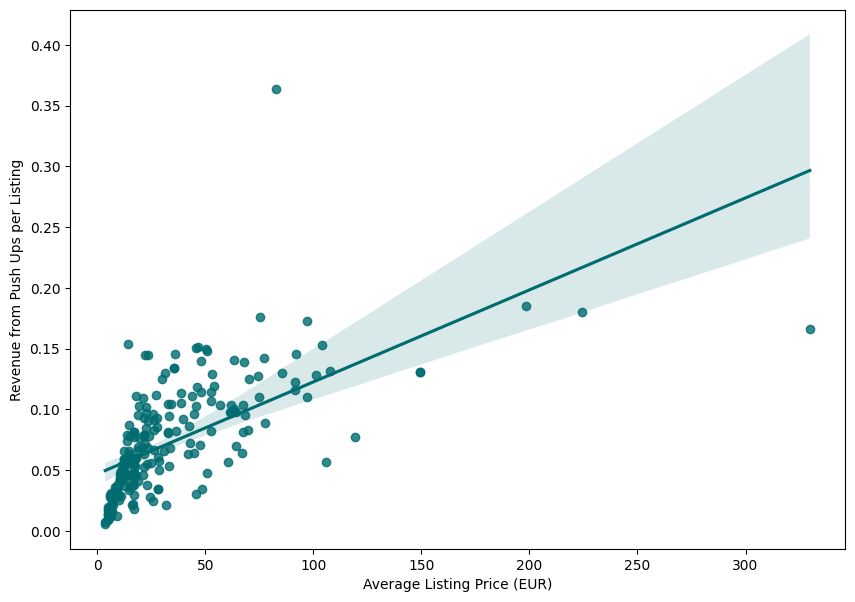

In [107]:
plt.figure(figsize=(10,7))
sns.regplot(x='avg_listing_price_eur', y='rev_per_list', data=df, color = '#006c70')
#plt.title('Correlation between Average Listing Price and Revenue from Push Ups pre Listing')
plt.xlabel('Average Listing Price (EUR)')
plt.ylabel('Revenue from Push Ups per Listing')
plt.savefig('correlation.png', dpi=300)
plt.show()


In [10]:
from scipy.stats import spearmanr

corr_spearman, p_value_spearman = spearmanr(df['avg_listing_price_eur'], df['rev_per_list'])
print(f'Spearman\'s Rank Correlation: {corr_spearman}')
print(f'P-value: {p_value_spearman}')


Spearman's Rank Correlation: 0.802130810433737
P-value: 4.8702438954530335e-50


The scatterplot and Spearman's rho (rho = 0.8021, p < 0.01) speak in favour of rejecting the null hypothesis of average listing price and push up revenue per listing being uncorrelated in favour of the alternative hypothesis. 

### C) Push Up feature performance

Not that well. For each listing the company gets on average 7 cents from pushup feature. --> 7/200 = 0.035 --> 3.5 % of listings get pushed. Could get more, but also don't want to much, otherwise "all" items will be pushed making the feature useless. 

### D) Why do sellers pay for push up in the GIRLS_CLOTHING / FOR_BABIES category??

People have no use of these items, better to sell than throw away.

In [113]:
df[(df['category_3'] == 'FOR\nBABIES')]

,category_2,category_3,number_of_listings,avg_listing_price_eur,revenue_from_push_ups,rev_per_list,push_up_percentage,num_push_ups,push_ups_per_listing
111,GIRLS\nCLOTHING,FOR\nBABIES,38647,3.728235,274.0,0.00709,53.64469,137.0,0.354491


## ALTERNATIVE STRATEGIES

### A) A different fixed price for the push up feature

In the case of price increase may lead to decreased demand from sellers who find the feature less cost-effective. Sellers may become more selective in using the feature, opting to promote only their highest-value or highest-margin listings. This could lead to a concentration of promoted listings in certain categories or price ranges, affecting the overall diversity and balance of listings on the platform. If competing platforms offer similar promotional features at lower prices, sellers may choose to allocate their marketing budget elsewhere. This could result in a loss of market share and decreased visibility for listings on the platform compared to competitors.


A lower price for the "push up" feature may stimulate increased demand from sellers, as the feature becomes more accessible and cost-effective. This could lead to a higher volume of promoted listings on the platform, potentially increasing revenue from this source. It may encourage more sellers to use it even for lower value listings. This could enhance the diversity of products seen buy the buyers. If the price is too low, however, to many listings would use it. Promoting a listing if every listing is promoted is not effective. While each promotion generates lower revenue due to the decreased price, the overall revenue from the "push up" feature may increase if the increase in demand outweighs the decrease in price.

### B) Dynamic pricing strategy

Naive approach would be to look at how the percentage of listings with push up vary with relative feature price percentage. This would disregard any information about the item category which might influence the optimal percentage.  

In [11]:
#calculate how much perctentage of average price per listing is 2 €
df['push_up_percentage'] = (2 / df['avg_listing_price_eur']) * 100
df['num_push_ups'] = df['revenue_from_push_ups'] / 2
#normalize df['num_push_ups'] by dividing by number_of_listings
df['push_ups_per_listing'] = df['num_push_ups'] / df['number_of_listings'] *100

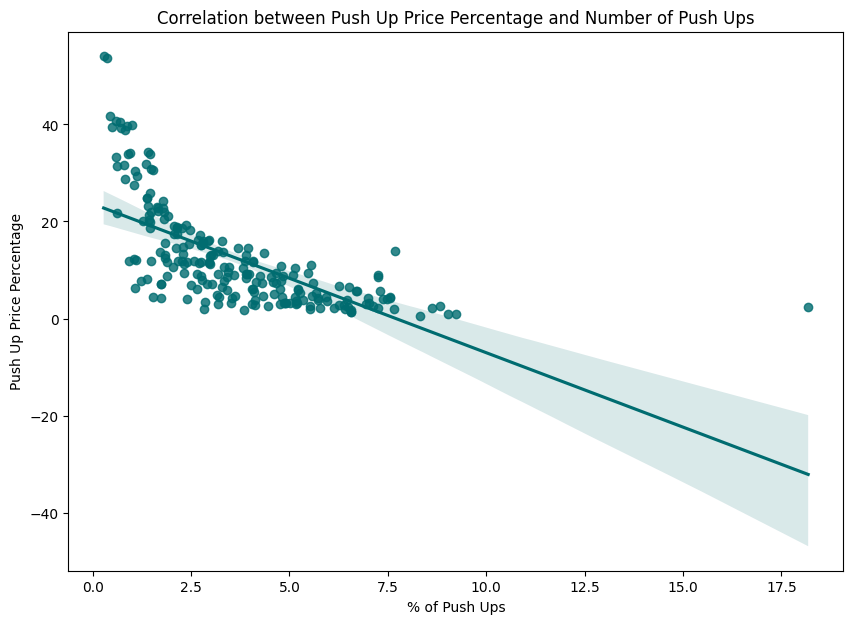

In [86]:
#scatter plot for push_up_percentage and num_push_ups
plt.figure(figsize=(10,7))
sns.regplot(x='push_ups_per_listing', y='push_up_percentage', data=df, color = '#006c70')
plt.title('Correlation between Push Up Price Percentage and Number of Push Ups')
plt.xlabel('% of Push Ups')
plt.ylabel('Push Up Price Percentage')
# plt.xscale('log') 
# plt.yscale('log')
plt.show()


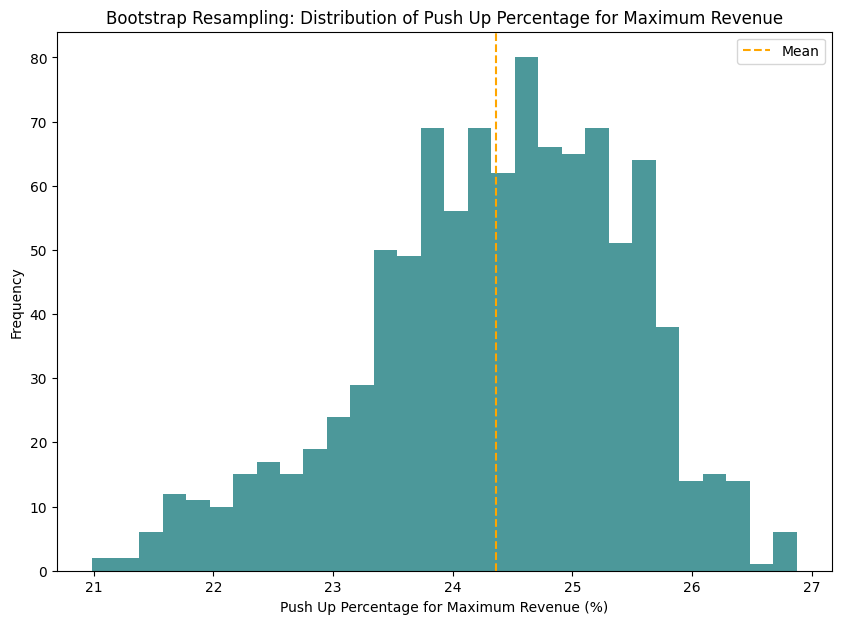

Mean Push Up Percentage for Maximum Revenue: 24.35951300041812
Standard Deviation of Push Up Percentage for Maximum Revenue: 1.0979237792295562
Standard Error of Push Up Price Percentage: 0.07453192261352659


In [118]:
total_revenue = df['push_up_percentage']*df['push_ups_per_listing']
# Define a function to fit the curve and find the maximum point
def fit_and_find_max(x_data, y_data):
    # Fit a polynomial of degree 2 to the data
    fit = np.polyfit(x_data, y_data, 2)
    fit_equation = np.poly1d(fit)

    # Define objective function to find maximum of the fitted curve
    def objective_function(x):
        return -fit_equation(x)  #


    optimal_push_up_percentage = minimize_scalar(objective_function, bounds=(0, 100), method='bounded').x
    max_total_revenue = -objective_function(optimal_push_up_percentage)

    return optimal_push_up_percentage, max_total_revenue, fit

# Perform bootstrap resampling and store maximum points
n_bootstraps = 1000  
max_points = []
for _ in range(n_bootstraps):
    # Resample data with replacement
    np.random.seed(_)
    bootstrap_indices = np.random.choice(len(df), len(df), replace=True)
    x_data_boot = df['push_up_percentage'].iloc[bootstrap_indices]
    y_data_boot = total_revenue.iloc[bootstrap_indices]

    # Fit the curve and find the maximum point
    max_point = fit_and_find_max(x_data_boot, y_data_boot)
    max_points.append(max_point)


max_push_up_percentages, max_total_revenues, fit_equation = zip(*max_points)


plt.figure(figsize=(10, 7))
plt.hist(max_push_up_percentages, bins=30, color='#006c70', alpha=0.7)
plt.axvline(x=np.mean(max_push_up_percentages), color='#ffa600', linestyle='--', label='Mean')
plt.xlabel('Push Up Percentage for Maximum Revenue (%)')
plt.ylabel('Frequency')
plt.title('Bootstrap Resampling: Distribution of Push Up Percentage for Maximum Revenue')
plt.legend()
plt.savefig('bootstrap_resampling.png', dpi=300)
plt.show()

mean_push_up_percentage = np.mean(max_push_up_percentages)
std_push_up_percentage = np.std(max_push_up_percentages)
mean_max_total_revenue = np.mean(max_total_revenues)
std_err = np.std(max_push_up_percentages) / np.sqrt(len(df))

print("Mean Push Up Percentage for Maximum Revenue:", np.mean(max_push_up_percentages))
print("Standard Deviation of Push Up Percentage for Maximum Revenue:", np.std(max_push_up_percentages))
print("Standard Error of Push Up Price Percentage:", std_err)


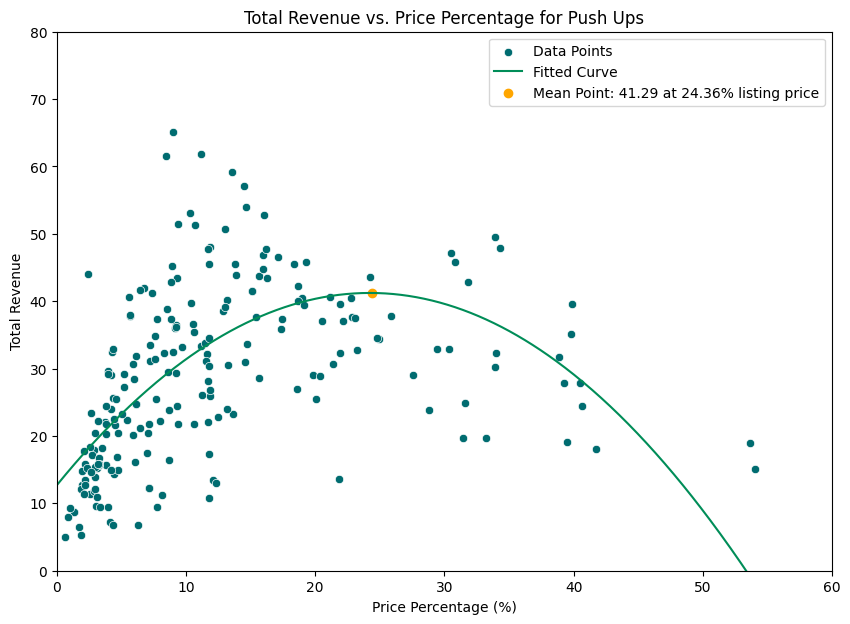

In [119]:
# Plot the scatter of data points
plt.figure(figsize=(10, 7))
sns.scatterplot(x='push_up_percentage', y=total_revenue, data=df, label='Data Points', color = '#006c70') 

#get mean coefficients from fit_equation
fit_equation = np.mean(fit_equation, axis=0)
#transform fit_equation to a function
fit_equation = np.poly1d(fit_equation)

# Plot the fit
x_fit = np.linspace(0, 100, 1000)
y_fit = fit_equation(x_fit)
plt.plot(x_fit, y_fit, color='#008d58', label='Fitted Curve')

# Plot the mean point
plt.scatter(mean_push_up_percentage, mean_max_total_revenue, color='#ffa600', label=f'Mean Point: {mean_max_total_revenue:.2f} at {mean_push_up_percentage:.2f}% listing price')

plt.xlabel('Price Percentage (%)')
plt.ylabel('Total Revenue')
plt.xlim(0, 60)
plt.ylim(0, 80)
plt.title('Total Revenue vs. Price Percentage for Push Ups')
plt.legend()
plt.savefig('total_revenue_vs_price_percentage.png', dpi=300)
plt.show()


In [120]:
price_perc = 24.36
#get percentage of listings with price_perc
perc_listings = df[df['push_up_percentage'] >= price_perc]['push_ups_per_listing'].mean() #to get the percentage of listings where push up will be used
push_up_revenue_sum = df['revenue_from_push_ups'].sum()
dynamic_revenue = df['avg_listing_price_eur'] * df['number_of_listings'] * price_perc / 100 * perc_listings/100
dynamic_revenue_sum = dynamic_revenue.sum()
print(f'Total revenue from push ups: {push_up_revenue_sum}')
print(f'Total revenue from dynamic pricing: {dynamic_revenue_sum}')
print(f'Difference: {push_up_revenue_sum - dynamic_revenue_sum}')

Total revenue from push ups: 887728.0
Total revenue from dynamic pricing: 696213.6536643365
Difference: 191514.34633566346


In [41]:
#if the same people who bought push ups will buy with dynamic pricing
price_perc = 24.36
#get percentage of listings with price_perc
#perc_listings = df[df['push_up_percentage'] >= price_perc]['push_ups_per_listing'].mean() #to get the percentage of listings where push up will be used
push_up_revenue_sum = df['revenue_from_push_ups'].sum()
dynamic_revenue = df['avg_listing_price_eur'] * df['number_of_listings'] * price_perc / 100 * df['push_ups_per_listing']/100
dynamic_revenue_sum = dynamic_revenue.sum()
print(f'Total revenue from push ups: {push_up_revenue_sum}')
print(f'Total revenue from dynamic pricing: {dynamic_revenue_sum}')
print(f'Difference: {push_up_revenue_sum - dynamic_revenue_sum}')

Total revenue from push ups: 887728.0
Total revenue from dynamic pricing: 3430003.5114413677
Difference: -2542275.5114413677


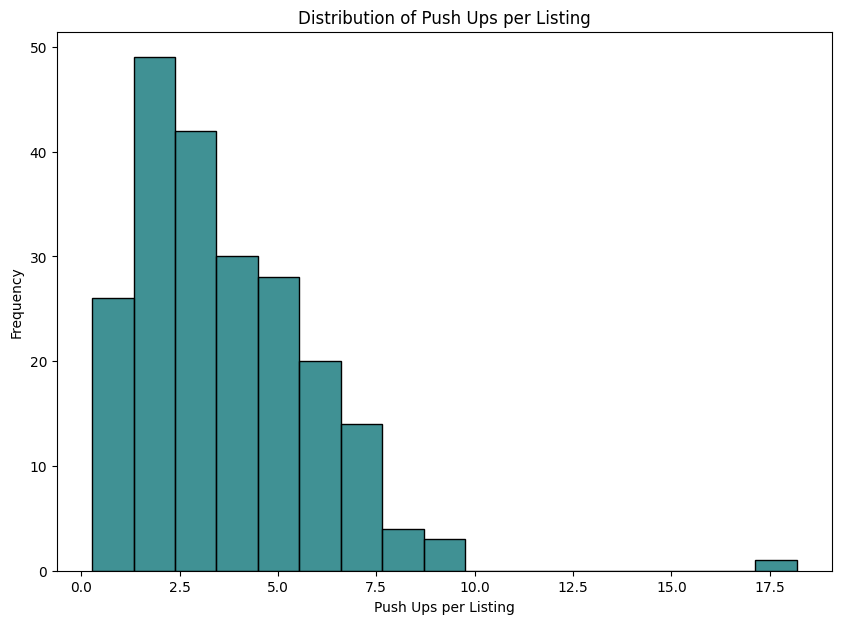

In [103]:
#distribution of pushups per listing
plt.figure(figsize=(10,7))
sns.histplot(df['push_ups_per_listing'], color = '#006c70')
plt.title('Distribution of Push Ups per Listing')
plt.xlabel('Push Ups per Listing')
plt.ylabel('Frequency')
plt.show()


### C) Uncertainty in dynamic pricing strategy analysis

## NEXT STEPS

### A) Preparation for fully scaling dynamic pricing

First, we should conduct pilot tests or experiments to evaluate the effectiveness of dynamic pricing. Test different pricing strategies and algorithms on a small scale to assess their impact on revenue, customer engagement, and user experience. Gather feedback from users and stakeholders to refine your approach before full implementation.

### B)

girls clothing

### C) Increasing the number of users

- promotions (discount, giving free push every n pushes)
- suggesting which listing to push
- making packages of listings to push
- push subscription
- making the push period longer (having different pricings for different lengths)